In [1]:
from pylab import *
from scipy.optimize import curve_fit

In [2]:
freq,Kmax=loadtxt('data_noerror.txt',unpack=True)

In [3]:
%%file dat.txt
8.21349e+14	3.10662e-19
7.40228e+14	2.55067e-19
6.87597e+14	2.19979e-19
5.4907e+14	1.30577e-19
5.19571e+14	1.11031e-19

Overwriting dat.txt


In [4]:
freq,Kmax=loadtxt('dat.txt',unpack=True)

In [5]:
def linearFunc(x,intercept,slope):
    y = intercept + slope * x
    return y

In [6]:
linearFunc(1,2,3)

5

In [7]:
a_fit,cov=curve_fit(linearFunc,freq,Kmax)
inter = a_fit[0];d_inter = sqrt(cov[0][0])
slope = a_fit[1];d_slope = sqrt(cov[1][1])

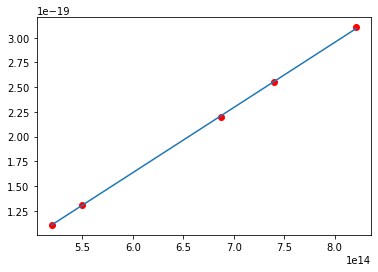

In [8]:
plot(freq,Kmax,'ro',label='Data')
Kmax_fit = inter + slope*freq
plot(freq,Kmax_fit,label='Fit')

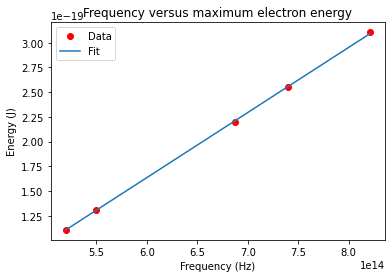

In [9]:
plot(freq,Kmax,'ro',label='Data')

# Compute a best fit from the fit intercept and slope.
Kmax_fit = inter + slope*freq

# Create a graph of the fit to the data.
plot(freq,Kmax_fit,label='Fit')

# Display a legend, label the x and y axes and title the graph.
legend()
xlabel('Frequency (Hz)')
ylabel('Energy (J)')
title('Frequency versus maximum electron energy')

# Save the figure to a file
savefig('noerror_fit.png')

# Show the graph in a new window on the users screen.
show()

In [10]:
print(f'The slope = {slope}, with uncertainty {d_slope}')
print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = 6.58375394121593e-34, with uncertainty 4.8389301124256446e-36
The intercept = -2.314103516495066e-19, with uncertainty 3.2581297976065846e-21


In [11]:
freq,Kmax,d_Kmax=loadtxt('data_error.txt',unpack=True)

In [12]:
a_fit,cov=curve_fit(linearFunc,freq,Kmax,sigma=d_Kmax)

In [13]:
inter = a_fit[0];slope = a_fit[1]
d_inter = sqrt(cov[0][0]);d_slope = sqrt(cov[1][1])

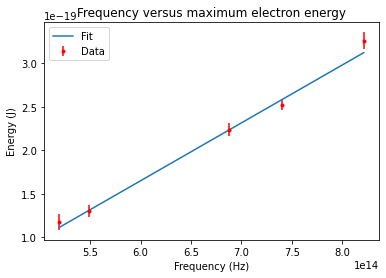

In [14]:
errorbar(freq,Kmax,yerr=d_Kmax,fmt='r.',label='Data')

# Compute a best fit line from the fit intercept and slope.
Kmax_fit = inter + slope*freq

# Create a graph of the fit to the data. We just use the ordinary plot
# command for this.
plot(freq,Kmax_fit,label='Fit')

# Display a legend, label the x and y axes and title the graph.
legend()
xlabel('Frequency (Hz)')
ylabel('Energy (J)')
title('Frequency versus maximum electron energy')

# Save the figure to a file
savefig('error_fit.png')

# Show the graph in a new window on the users screen.
show()

In [15]:
print(f'The slope = {slope}, with uncertainty {d_slope}')
print(f'The intercept = {inter}, with uncertainty {d_inter}')

The slope = 6.6560286973775526e-34, with uncertainty 3.549213552024548e-35
The intercept = -2.343068168255266e-19, with uncertainty 2.395324805774619e-20


In [16]:
chisqr = sum((Kmax-linearFunc(freq,inter,slope))**2/d_Kmax**2)
dof = len(Kmax) - 2
chisqr_red = chisqr/dof
print(f'Reduced chi^2 = {chisqr_red}')

Reduced chi^2 = 1.2633310164062912


In [21]:
6.6260286973775526e-34/1.60E-20

4.14126793586097e-14

In [22]:
4.141414141e-14*1.60E-20

6.62626262560000e-34